In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_validate

In [2]:
# data = load_breast_cancer()
# x = data.data
# y = data.target

In [3]:
import pandas as pd
data = pd.read_csv('datasets/final1.csv')
del data['Unnamed: 0']
data.tail()

,ID,background_tissue,class,severity,x,y,rad,mean,var,std,min_pixel,max_pixel,min_coor_x,min_coor_y,max_coor_x,max_coor_y,bdips
307,mdb318,D,NORM,N,442,68,50,14.033015,0.505857,0.711236,11,35,436,951,467,965,0.000641
308,mdb319,D,NORM,N,590,281,50,145.912938,28.130725,5.303841,130,168,587,778,637,745,0.000114
309,mdb320,D,NORM,N,495,264,50,195.578840,470.810515,21.698168,146,227,451,745,527,722,0.000004
310,mdb321,D,NORM,N,604,271,50,177.764946,30.464061,5.519426,163,199,626,740,555,746,0.000026
311,mdb322,D,NORM,N,460,115,50,8.994009,7.767332,2.786993,6,24,493,895,446,863,0.000786


In [4]:
x = data.iloc[:,[7,8,9,10,11,16]]
y = data['severity']
di = {'N':0, 'B':1, 'M':2}
y = y.map(di)
x = x.drop([243])
y = y.drop([243])

In [5]:
x

,mean,var,std,min_pixel,max_pixel,bdips
0,150.781051,3205.504934,56.617179,5,221,0.000007
1,197.870827,764.537398,27.650269,75,229,0.000055
2,149.605105,409.222292,20.229243,84,187,0.000087
3,162.426214,80.178549,8.954248,128,181,0.000578
4,184.385157,127.091607,11.273491,155,208,0.000287
...,...,...,...,...,...,...
307,14.033015,0.505857,0.711236,11,35,0.000641
308,145.912938,28.130725,5.303841,130,168,0.000114
309,195.578840,470.810515,21.698168,146,227,0.000004
310,177.764946,30.464061,5.519426,163,199,0.000026


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state=42, stratify = y)

# KNN

In [7]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': np.arange(15)}
reg = KNeighborsClassifier()
model = GridSearchCV(reg, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

{'n_neighbors': 10}

In [9]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
print("Test set R^2: {:.2f}".format(knn.score(x_test, y_test)))
y_pred = knn.predict(x_test)
y_pred

Test set R^2: 0.63


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [8]:
np.array(y_test)

array([0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0],
      dtype=int64)

In [10]:
y_scores = knn.predict_proba(x_test)
fpr_knn, tpr_knn, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [13]:
scores = cross_validate(knn, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.00310206, 0.        , 0.00298905, 0.00199485, 0.00199485]), 'score_time': array([0.00326443, 0.00967479, 0.00398803, 0.00299215, 0.00299883]), 'test_score': array([0.61904762, 0.62903226, 0.59677419, 0.5483871 , 0.62903226]), 'train_score': array([0.66129032, 0.65461847, 0.64257028, 0.6746988 , 0.6746988 ])}


# SVM


In [15]:
svm = sklearn.svm.SVC(C = 30, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=30)

In [16]:
svm.score(x_train, y_train)


0.6451612903225806

In [17]:
svm.score(x_test, y_test)


0.6190476190476191

In [18]:
y_pred = svm.predict(x_test)
y_pred == y_test

169     True
167     True
173     True
11     False
299     True
       ...  
63     False
269     True
250     True
311     True
221     True
Name: severity, Length: 63, dtype: bool

In [19]:
y_scores = svm.predict(x_test)
fpr_svm, tpr_svm, threshold = roc_curve(y_test, y_scores, pos_label= 1)
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [20]:
from sklearn.model_selection import cross_validate
scores = cross_validate(svm, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.00398779, 0.00401473, 0.00653243, 0.00395536, 0.00394797]), 'score_time': array([0.00203371, 0.00155354, 0.0019567 , 0.00203657, 0.00099587]), 'test_score': array([0.63492063, 0.62903226, 0.61290323, 0.5483871 , 0.61290323]), 'train_score': array([0.63306452, 0.62650602, 0.63453815, 0.67871486, 0.65060241])}


# Decision Tree


In [8]:
from sklearn.tree import DecisionTreeClassifier


In [9]:
# tree=DecisionTreeClassifier(max_depth=2,random_state=42)
tree = DecisionTreeClassifier(random_state=42,max_depth=5)

In [10]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [11]:
y_pred = tree.predict(x_test)

In [12]:
print('Độ chính xác tập huấn luyện: {:.4f}'.format(tree.score(x_train, y_train)))
print('Độ chính xác tập kiểm tra: {:.4f}'.format(tree.score(x_test, y_test)))

Độ chính xác tập huấn luyện: 0.8226
Độ chính xác tập kiểm tra: 0.6825


In [13]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [14]:
print_score(tree, x_train, y_train, x_test, y_test, train=False)

Test Result:

accuracy score: 0.6825

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84        39
           1       0.48      0.71      0.57        14
           2       0.29      0.20      0.24        10

    accuracy                           0.68        63
   macro avg       0.55      0.57      0.55        63
weighted avg       0.70      0.68      0.68        63


Confusion Matrix: 
 [[31  5  3]
 [ 2 10  2]
 [ 2  6  2]]



In [15]:
y_scores = tree.predict_proba(x_test)
fpr_tree, tpr_tree, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_tree = auc(fpr_tree, tpr_tree)


In [16]:
scores = cross_validate(tree, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.0039897 , 0.00254059, 0.00196171, 0.00199485, 0.00398898]), 'score_time': array([0.00099778, 0.00095725, 0.00150061, 0.00199533, 0.00199795]), 'test_score': array([0.66666667, 0.59677419, 0.62903226, 0.56451613, 0.69354839]), 'train_score': array([0.7983871 , 0.79919679, 0.82730924, 0.82730924, 0.81526104])}


# Random forest


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [19]:
print_score(rf, x_train, y_train, x_test, y_test, train=True)
print('\n')
print_score(rf, x_train, y_train, x_test, y_test, train=False)

Train Result:

accuracy score: 0.8548

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       153
           1       0.83      0.74      0.78        54
           2       0.89      0.59      0.71        41

    accuracy                           0.85       248
   macro avg       0.86      0.76      0.80       248
weighted avg       0.86      0.85      0.85       248


Confusion Matrix: 
 [[148   3   2]
 [ 13  40   1]
 [ 12   5  24]]

Average Accuracy: 	 0.6375
Accuracy SD: 		 0.0752


Test Result:

accuracy score: 0.6667

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.87      0.80        39
           1       0.44      0.50      0.47        14
           2       1.00      0.10      0.18        10

    accuracy                           0.67        63
   macro avg       0.73      0.49      0.48        63
weighted avg       0.71      0.67      0.63   

In [20]:
y_scores = rf.predict_proba(x_test)
fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [21]:
scores = cross_validate(rf, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.01473856, 0.01746392, 0.01396704, 0.01195908, 0.        ]), 'score_time': array([0.00250673, 0.00301933, 0.00200391, 0.00198913, 0.        ]), 'test_score': array([0.66666667, 0.61290323, 0.58064516, 0.58064516, 0.72580645]), 'train_score': array([0.85483871, 0.86345382, 0.81927711, 0.85140562, 0.86746988])}


# Neural Network


In [35]:
# build model
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(6,)))
Dropout(0.25)
model.add(Dense(units=16, activation='relu'))
Dropout(0.25)
model.add(Dense(units=3, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                112       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


In [31]:
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42, stratify = y_train)

In [32]:
# y_train = keras.utils.to_categorical(y_train, 3)
# y_val = keras.utils.to_categorical(y_val, 3)
# y_test = keras.utils.to_categorical(y_test, 3)
# print('categorical y_train: ', y_train.shape)
# print('categorical y_val : ', y_val.shape)
# print('categorical y_test : ', y_test.shape)

categorical y_train:  (186, 3)
categorical y_val :  (62, 3)
categorical y_test :  (63, 3)


In [41]:
from tensorflow.keras.optimizers import SGD
# Compile model
epochs = 100
lr = 0.001
# decay = lr/epochs
# sgd = SGD(lr=lr, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=lr), metrics=['accuracy'])

In [42]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=epochs,
                    verbose=True,
                    validation_data=(x_val, y_val))

Epoch 1/100
6/6 [==============================] - 1s 81ms/step - loss: 0.8271 - accuracy: 0.6552 - val_loss: 1.1281 - val_accuracy: 0.5968
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 0.8425 - accuracy: 0.6573 - val_loss: 1.0543 - val_accuracy: 0.5968
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 0.8895 - accuracy: 0.6044 - val_loss: 1.0718 - val_accuracy: 0.5806
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.8868 - accuracy: 0.6586 - val_loss: 1.0442 - val_accuracy: 0.5968
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 0.8329 - accuracy: 0.6499 - val_loss: 1.0414 - val_accuracy: 0.5968
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.8112 - accuracy: 0.6772 - val_loss: 1.0483 - val_accuracy: 0.5806
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.8191 - accuracy: 0.6733 - val_loss: 1.0708 - val_accuracy: 0.5968
Epoch 8/100
6/6 [===

In [30]:
# save model as json
model_json = model.to_json()
with open("model_nonorm.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model_nonorm.h5")
print("Saved model to disk")

Saved model to disk


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


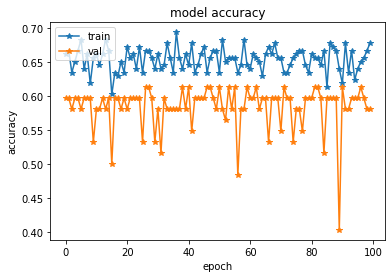

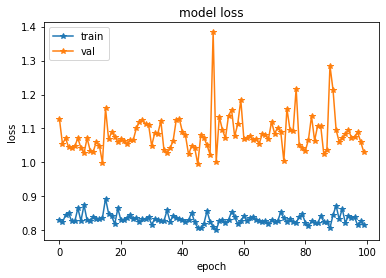

In [43]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], marker = "*")
plt.plot(history.history['val_accuracy'], marker = "*")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], marker = "*")
plt.plot(history.history['val_loss'], marker = "*")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
score = model.evaluate(x_test, y_test, verbose=True)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.9830 - accuracy: 0.6032
Test loss: 0.9829999804496765
Test accuracy: 0.60317462682724


In [42]:
y_scores = model.predict(x_test)
fpr_nn, tpr_nn, threshold = roc_curve(y_test, y_scores[:,1], pos_label= 1)
roc_auc_nn = auc(fpr_nn, tpr_nn)

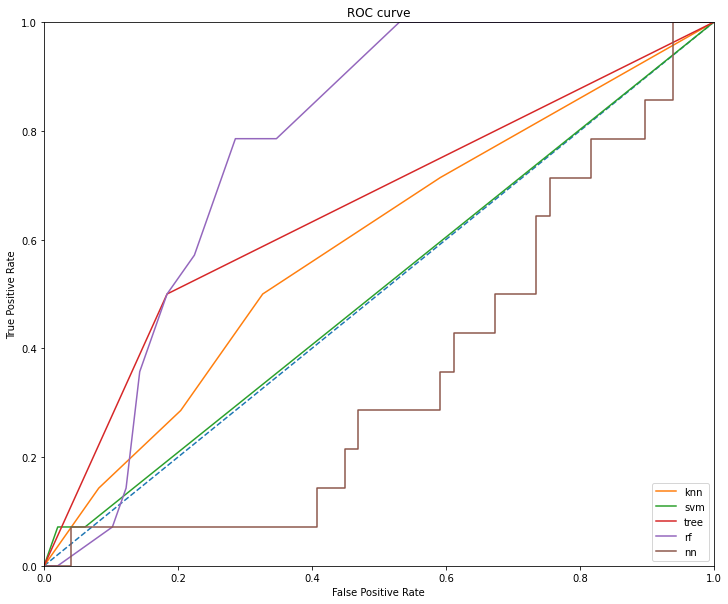

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
# 9.2 Also connect diagonals
ax.plot([0, 1], [0, 1], ls="--")   # Dashed diagonal line
# 9.3 Labels etc
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
# 9.4 Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# 9.5 Plot each graph now
ax.plot(fpr_knn, tpr_knn, label = "knn")
ax.plot(fpr_svm, tpr_svm, label = "svm")
ax.plot(fpr_tree, tpr_tree, label = "tree")
ax.plot(fpr_rf, tpr_rf, label = "rf")
ax.plot(fpr_nn, tpr_nn, label = "nn")

# 9.6 Set legend and show plot
ax.legend(loc="lower right")
plt.show()